# Get Layer by Item ID

In [3]:
import importlib
import os
from pathlib import Path
import sys

from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from dotenv import load_dotenv, find_dotenv
import pandas as pd

# import arcpy if available
if importlib.util.find_spec("arcpy") is not None:
    import arcpy

In [4]:
# load environment variables from .env
load_dotenv(find_dotenv())

# load the "autoreload" extension so that code can change, & always reload modules so that as you change code in src, it gets loaded
%load_ext autoreload
%autoreload 2

# create a GIS object instance; if you did not enter any information here, it defaults to anonymous access to ArcGIS Online
gis = GIS(
    url=os.getenv('ESRI_GIS_URL'), 
    username=os.getenv('ESRI_GIS_USERNAME'),
    password=os.getenv('ESRI_GIS_PASSWORD')
)

gis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


GIS @ https://geoai.maps.arcgis.com version:8.1

In [46]:
itm_id = "999b5d0dbe2742bc92cfb126a33ff057"
print(f'https://arcgis.com/home/item.html?id={itm_id}')

https://arcgis.com/home/item.html?id=999b5d0dbe2742bc92cfb126a33ff057


<Item title:"COVID-19 Daily Cases LA County - Cities and Communities" type:Feature Layer Collection owner:HSACadmin>
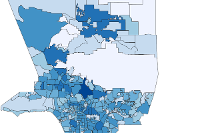

In [39]:
itm = gis.content.get(itm_id)
itm

In [40]:
lyr_lst = itm.layers
lyr_lst

[<FeatureLayer url:"https://services7.arcgis.com/aFfS9FqkIRSo0Ceu/arcgis/rest/services/COVID19_Daily_Cases_LA_County_View_Only/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/aFfS9FqkIRSo0Ceu/arcgis/rest/services/COVID19_Daily_Cases_LA_County_View_Only/FeatureServer/1">]

In [41]:
lyr = lyr_lst[1]
lyr

<FeatureLayer url:"https://services7.arcgis.com/aFfS9FqkIRSo0Ceu/arcgis/rest/services/COVID19_Daily_Cases_LA_County_View_Only/FeatureServer/1">

In [42]:
df = lyr.query(out_sr=4326, as_df=True)
df.head()

/Users/joel5174/miniconda3/envs/la-covid/lib/python3.8/site-packages/arcgis/features/layer.py:2044: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  "esriFieldTypeDate" : pd.datetime,


,OBJECTID,Name,Confirmed_Cases,Confirmed_Deaths,Label_Name,GlobalID,EditDate,Estimated_Population,Crude_Rate_Per_100000,AVG_CDC_SVI_Score,Death_Rate,SHAPE
0,204,Los Angeles County (excl. LB and Pas),47208,2078.0,Los Angeles County (excl. LB and Pas),0ce21772-a704-4c66-8327-609d637e2338,2020-05-28 22:25:59.670,NaN,NaN,NaN,NaN,"{""rings"": [[[-118.415318938229, 32.79520151226..."
1,205,Under Investigation,1948,NaN,Under Investigation,fc247b7f-097c-4382-b26b-28a84f23fafc,2020-05-28 22:22:22.643,NaN,NaN,NaN,NaN,"{""rings"": [[[-118.415318938229, 32.79520151226..."
2,206,City of Agoura Hills,35,0.0,Agoura Hills,24426fd6-b002-4dbd-bd62-3e1d2820f61b,2020-05-28 22:22:22.643,20883.0,167.600441,0.18,0.000000,"{""rings"": [[[-118.728636165797, 34.16792606715..."
3,207,City of Alhambra,191,8.0,Alhambra,1a6c5add-7cfa-4de3-b7f4-26de6c8b73b9,2020-05-28 22:25:59.670,86724.0,220.238919,0.66,9.224667,"{""rings"": [[[-118.121087787166, 34.10536850013..."
4,208,City of Arcadia,80,5.0,Arcadia,f05ba124-f38b-4e35-964d-fdf931ea8965,2020-05-28 22:25:59.670,57754.0,138.518544,0.39,8.657409,"{""rings"": [[[-118.006721561246, 34.12934573330..."


In [47]:
df.spatial.plot(gis=GIS())

/Users/joel5174/miniconda3/envs/la-covid/lib/python3.8/site-packages/arcgis/features/geo/_accessor.py:2362: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


MapView(layout=Layout(height='400px', width='100%'))

In [44]:
fld_df = pd.DataFrame(lyr.properties.fields)
fld_df

,alias,defaultValue,domain,editable,length,name,nullable,sqlType,type
0,OBJECTID,None,None,False,NaN,OBJECTID,False,sqlTypeOther,esriFieldTypeOID
1,City/Community,None,None,True,500.0,Name,True,sqlTypeOther,esriFieldTypeString
2,Cases,None,None,True,NaN,Confirmed_Cases,True,sqlTypeOther,esriFieldTypeDouble
3,Deaths,None,None,True,NaN,Confirmed_Deaths,True,sqlTypeOther,esriFieldTypeDouble
4,Name,None,None,True,255.0,Label_Name,True,sqlTypeOther,esriFieldTypeString
5,GlobalID,None,None,False,38.0,GlobalID,False,sqlTypeOther,esriFieldTypeGlobalID
6,Edit Date,None,None,False,8.0,EditDate,True,sqlTypeOther,esriFieldTypeDate
7,Population,None,None,True,NaN,Estimated_Population,True,sqlTypeOther,esriFieldTypeDouble
8,Crude Rate Per 100K,None,None,True,NaN,Crude_Rate_Per_100000,True,sqlTypeOther,esriFieldTypeDouble
9,Average Overall Social Vulnerability Index 2018,None,None,True,NaN,AVG_CDC_SVI_Score,True,sqlTypeOther,esriFieldTypeDouble
